<a href="https://colab.research.google.com/github/hemanth346/mde_bs/blob/master/notebooks/mask_depth_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Sun May 24 13:32:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
batch_size = 32
size = 64

In [0]:
import os
import sys
import cv2
import numpy as np
from pathlib import Path
import zipfile
from PIL import Image
import io
import matplotlib.pyplot as plt

In [0]:
root_dir = '/content/drive/My Drive/DL/Trail_Dataset'
# Path(root_dir).joinpath('bg')
bg_dir = Path(root_dir+'/bg')
fg_dir = Path(root_dir+'/fg')
fg_masks_dir = Path(root_dir+'/fg_masks')
fg_bg_dir = Path(root_dir+'/fg_bg')
mask_dir = Path(root_dir+'/fg_bg_masks')
depth_dir = Path(root_dir+'/depth_maps')

In [0]:
module_path = '/content/drive/My Drive/DL/mdebs'
sys.path.insert(0, module_path)

In [0]:
# autoreload module content
%load_ext autoreload
%autoreload 2

In [0]:
import engine
from engine.datasets import train_set, train_set, validation_set
from engine import models
from engine import trainer
from engine import utils

In [0]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

In [0]:
train_loader = DataLoader(train_set, 
                      batch_size=batch_size, 
                      shuffle=True,
                      pin_memory=True)

In [0]:
test_loader = DataLoader(train_set, batch_size=128, shuffle=False)

In [0]:
def show_images(imgs, permute=False, ncols=4, figsize=(8, 8)):
    f, axes = plt.subplots(nrows=(len(imgs)//ncols), ncols=ncols, figsize=figsize)
    ax = axes.flatten()
    for idx, img in enumerate(imgs):
        if permute:
            ax[idx].imshow(img.permute(1, 2, 0))
        else:
            ax[idx].imshow(img[0], cmap='Greys')
    plt.show()

In [0]:
# sample_batch = next(iter(train_loader))

In [0]:
# show_images(sample_batch[1])
# show_images(sample_batch[0][:,:3,:,:], permute=True)
# show_images(sample_batch[0][:,3:,:,:], permute=True)

In [0]:
model = models.GroupTransConv
device = ("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [0]:
summary(model, (6, size, size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 62, 62]             864
       BatchNorm2d-2           [-1, 32, 62, 62]              64
              ReLU-3           [-1, 32, 62, 62]               0
            Conv2d-4           [-1, 64, 60, 60]           9,216
       BatchNorm2d-5           [-1, 64, 60, 60]             128
              ReLU-6           [-1, 64, 60, 60]               0
            Conv2d-7          [-1, 128, 58, 58]          36,864
       BatchNorm2d-8          [-1, 128, 58, 58]             256
              ReLU-9          [-1, 128, 58, 58]               0
           Conv2d-10          [-1, 256, 56, 56]         147,456
      BatchNorm2d-11          [-1, 256, 56, 56]             512
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13           [-1, 32, 56, 56]           4,096
      BatchNorm2d-14           [-1, 32,

In [0]:
!nvidia-smi

import torch, gc
gc.collect()
torch.cuda.ipc_collect()
torch.cuda.empty_cache()

!nvidia-smi

Sun May 24 13:42:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    30W / 250W |  15899MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
save_path = '/content/drive/My Drive/DL/mdebs/models'

In [0]:
model = utils.load_checkpoint(model, os.path.join(save_path,'mask_depth_10.pth'), device=device)

In [0]:
trainer.train(model, device=device, epochs=2, save=save_path, show=False)

Training... Current batch loss : 0.23154: 100%|██████████████████████████████████| 326/326 [25:16<00:00, 4.65s/it]


Test loss : 0.25734


Training... Current batch loss : 0.21392 : 100%|██████████████████████████████████| 326/326 [20:34<00:00, 3.79s/it]


Test loss : 0.23852


In [0]:
utils.save_model(name='mask_depth_11.pth', model=model, save_dir=save_path)

Model saved at "/content/drive/My Drive/DL/mdebs/models/mask_depth_11.pth"


In [0]:
val_loader = DataLoader(validation_set, batch_size=128, shuffle=False)
mask_score, depth_score =  utils.get_score(val_loader)
mask_score, depth_score

Dice scores - mask: 0.88231 | Depth : 0.25275: 100%|████████████████████████████████████| 5/5 [00:45<00:00, 9s/it]


(0.86731, 0.34312)

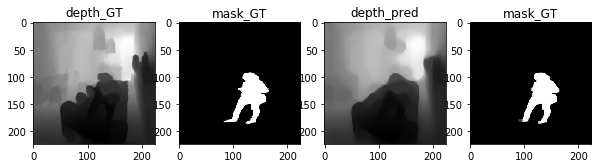

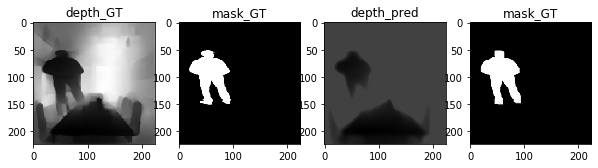

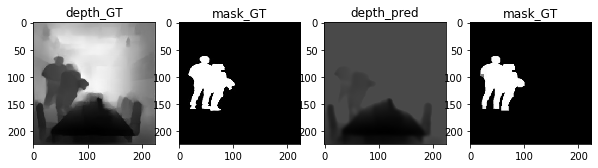

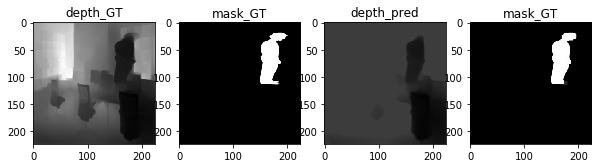

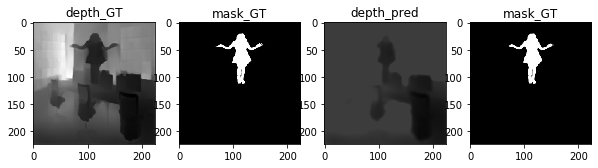

In [0]:
utils.predict_val(model_path=os.path.join(save_path, 'mask_depth_11.pth'), root_dir='test_images/', num=5, save=True, show=True, figsize=(10, 20))